# Imagenes en memoria
# Canales
# Histograma

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('C:\GitHub\pythonPrograms\computerVision2023\clasess')

import plot
%matplotlib inline
plt.style.use('dark_background') 

path = 'C:\GitHub\pythonPrograms\computerVision2023\clases\imagenes'

In [4]:
im = cv.imread(path+'\Baboon.tiff', cv.IMREAD_COLOR)
# RGB -> BGR
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)

In [6]:
img.shape

(512, 512, 3)

In [7]:
rows, cols, channels = img.shape
print('Rows {0}\nCols {1}\nChannels {2}'.format(rows,cols,channels))

Rows 512
Cols 512
Channels 3


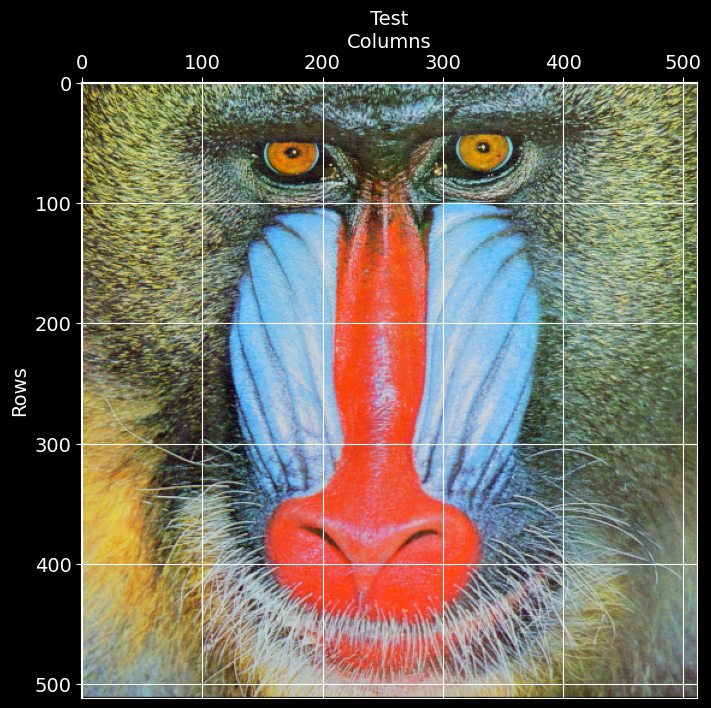

In [10]:
def imgview(img, title=None, filename=None, axis=False):
    """
    """
    r,c = img.shape[0:2]
    k=8
    fig = plt.figure(figsize=(k,k))
    ax = fig.add_subplot(111)
    if len(img.shape) == 3:
        im = ax.imshow(img,extent=None)
    else:
        im = ax.imshow(img,extent=None,cmap='gray',vmin=0,vmax=255)
    if title != None:
        ax.set_title(title,fontsize=14)
    if not axis:
        plt.axis('off')
    else:
        ax.grid(c='w')
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top') 
        ax.set_xlabel('Columns',fontsize=14)
        ax.set_ylabel('Rows',fontsize=14)
        ax.xaxis.label.set_color('w')
        ax.yaxis.label.set_color('w')
        ax.tick_params(axis='x', colors='w',labelsize=14)
        ax.tick_params(axis='y', colors='w',labelsize=14)
        
    if filename != None:
        plt.savefig(filename)
    plt.show()
    
imgview(img, title = 'Test', filename='Test.jpg', axis=True)

In [11]:
# first row of the image in channel 0
print(img[0:rows,0:2,1])

[[150  57]
 [125  97]
 [ 74 118]
 ...
 [148 156]
 [169 151]
 [ 11  12]]


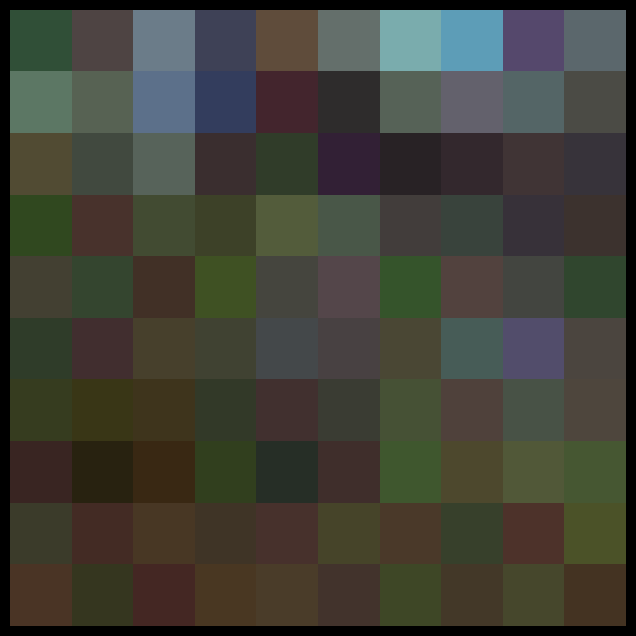

In [14]:
imgview(img[30:40,200:210,0:3], axis=False)

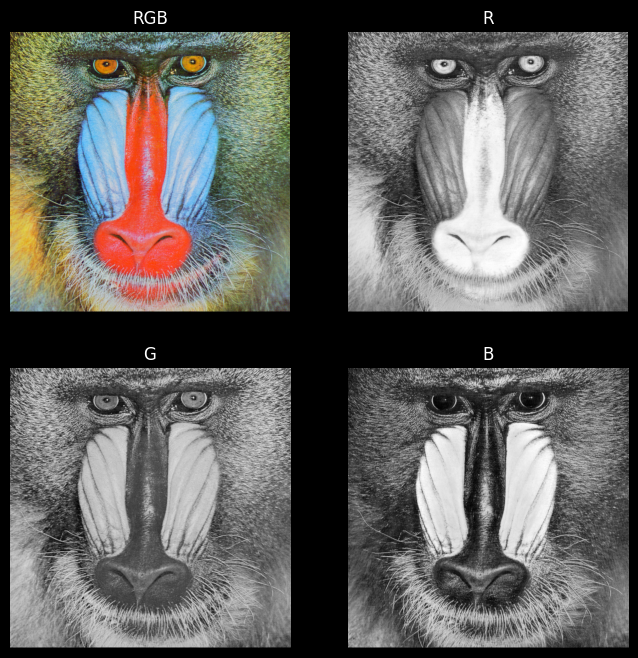

In [32]:
def splitrgb(img, filename = None):
    if (img.shape[2] != 3):
        return img.shape

    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]

    k=8
    fig = plt.figure(figsize=(k,k))
    
    ax = fig.add_subplot(2,2,1)
    ax.set_title('RGB')
    ax.imshow(img)
    plt.axis('off')

    ax = fig.add_subplot(2,2,2)
    ax.set_title('R')
    ax.imshow(r, extent=None, cmap = 'gray', vmin = 0, vmax = 255)
    plt.axis('off')

    ax = fig.add_subplot(2,2,3)
    ax.set_title('G')
    ax.imshow(g, extent=None, cmap = 'gray', vmin = 0, vmax = 255)
    plt.axis('off')

    ax = fig.add_subplot(2,2,4)
    ax.set_title('B')
    ax.imshow(b, extent=None, cmap = 'gray', vmin = 0, vmax = 255)
    plt.axis('off')
    
    if filename != None:
        plt.savefig(filename)
    plt.plot()

splitrgb(img)

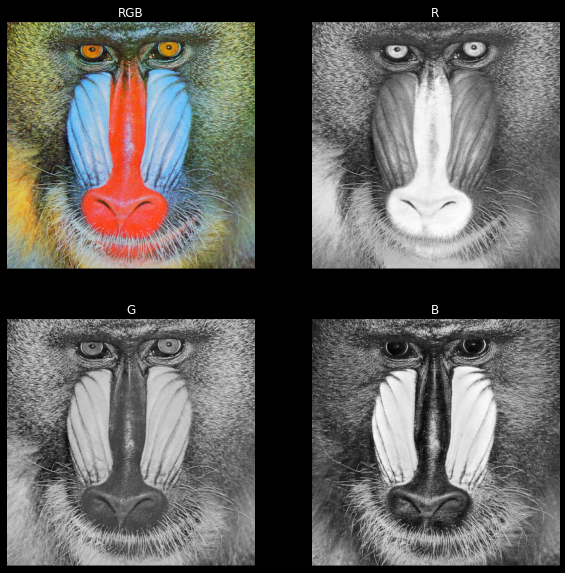

In [57]:
def splitrgb(img):
    """
    """
    fig = plt.figure(figsize=(10,10))
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    ax1 = fig.add_subplot(221)
    ax1.imshow(img)
    ax1.set_title('RGB')
    plt.axis('off')
    ax2 = fig.add_subplot(222)
    ax2.imshow(r,cmap='gray', vmin=0, vmax=255)
    ax2.set_title('R')
    plt.axis('off')
    ax3 = fig.add_subplot(223)
    ax3.imshow(g,cmap='gray', vmin=0, vmax=255)
    ax3.set_title('G')
    plt.axis('off')
    ax4 = fig.add_subplot(224)
    ax4.imshow(b,cmap='gray', vmin=0, vmax=255)
    ax4.set_title('B')
    plt.axis('off')
    plt.show()

splitrgb(img)

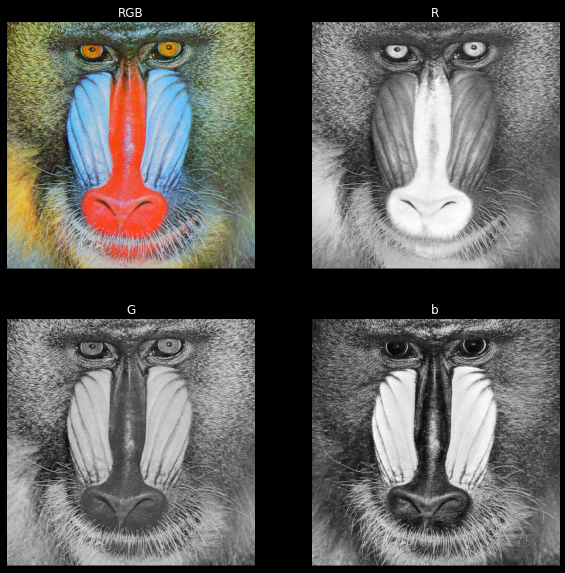

In [58]:
def split_rgb2(img, filename=None):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(221)
    ax1.imshow(img)
    ax1.set_title('RGB')
    plt.axis('off')
    ax2 = fig.add_subplot(222,)
    ax2.imshow(img[:,:,0],cmap='gray',vmin=0,vmax=255)
    ax2.set_title('R')
    plt.axis('off')
    ax3 = fig.add_subplot(223)
    ax3.imshow(img[:,:,1],cmap='gray',vmin=0,vmax=255)
    ax3.set_title('G')
    plt.axis('off')
    ax4 = fig.add_subplot(224)
    ax4.imshow(img[:,:,2],cmap='gray',vmin=0,vmax=255)
    ax4.set_title('b')
    plt.axis('off')

    if filename != None:
        plt.savefig(filename)
    plt.show()
split_rgb2(img,'rgb_split.png')

In [33]:
for v in img[255,0:512,2]:
    print(v, end=' ')

100 107 91 83 59 63 83 79 66 72 89 79 96 93 88 117 95 99 100 114 121 119 123 147 130 142 142 129 117 87 84 68 75 86 97 90 114 97 64 61 69 63 59 69 97 135 161 146 126 100 82 98 93 90 101 56 66 81 67 76 59 48 60 76 52 36 46 46 28 58 63 52 30 35 32 48 78 91 85 75 80 73 59 60 50 64 86 57 29 35 26 19 25 36 32 43 43 48 50 36 45 57 39 36 73 62 34 36 23 35 32 31 34 63 54 60 64 80 108 52 31 24 16 23 31 57 50 33 98 219 239 245 246 235 232 242 239 241 239 231 233 229 216 209 202 156 177 217 231 236 238 235 233 232 232 232 232 225 228 226 223 228 228 223 224 223 214 214 209 212 221 193 193 210 220 228 225 221 219 218 225 222 222 223 224 219 214 216 218 219 220 221 220 224 214 205 215 215 218 219 220 221 222 226 231 228 222 213 205 202 183 90 25 26 22 14 17 18 18 8 17 29 21 7 17 28 15 22 16 20 24 16 15 21 17 37 51 46 48 112 125 87 139 139 134 170 192 164 141 157 169 183 187 203 203 203 201 188 190 172 150 131 99 67 36 41 25 17 22 16 25 50 30 27 40 41 50 25 25 25 30 48 54 55 86 199 232 233 228 216 2

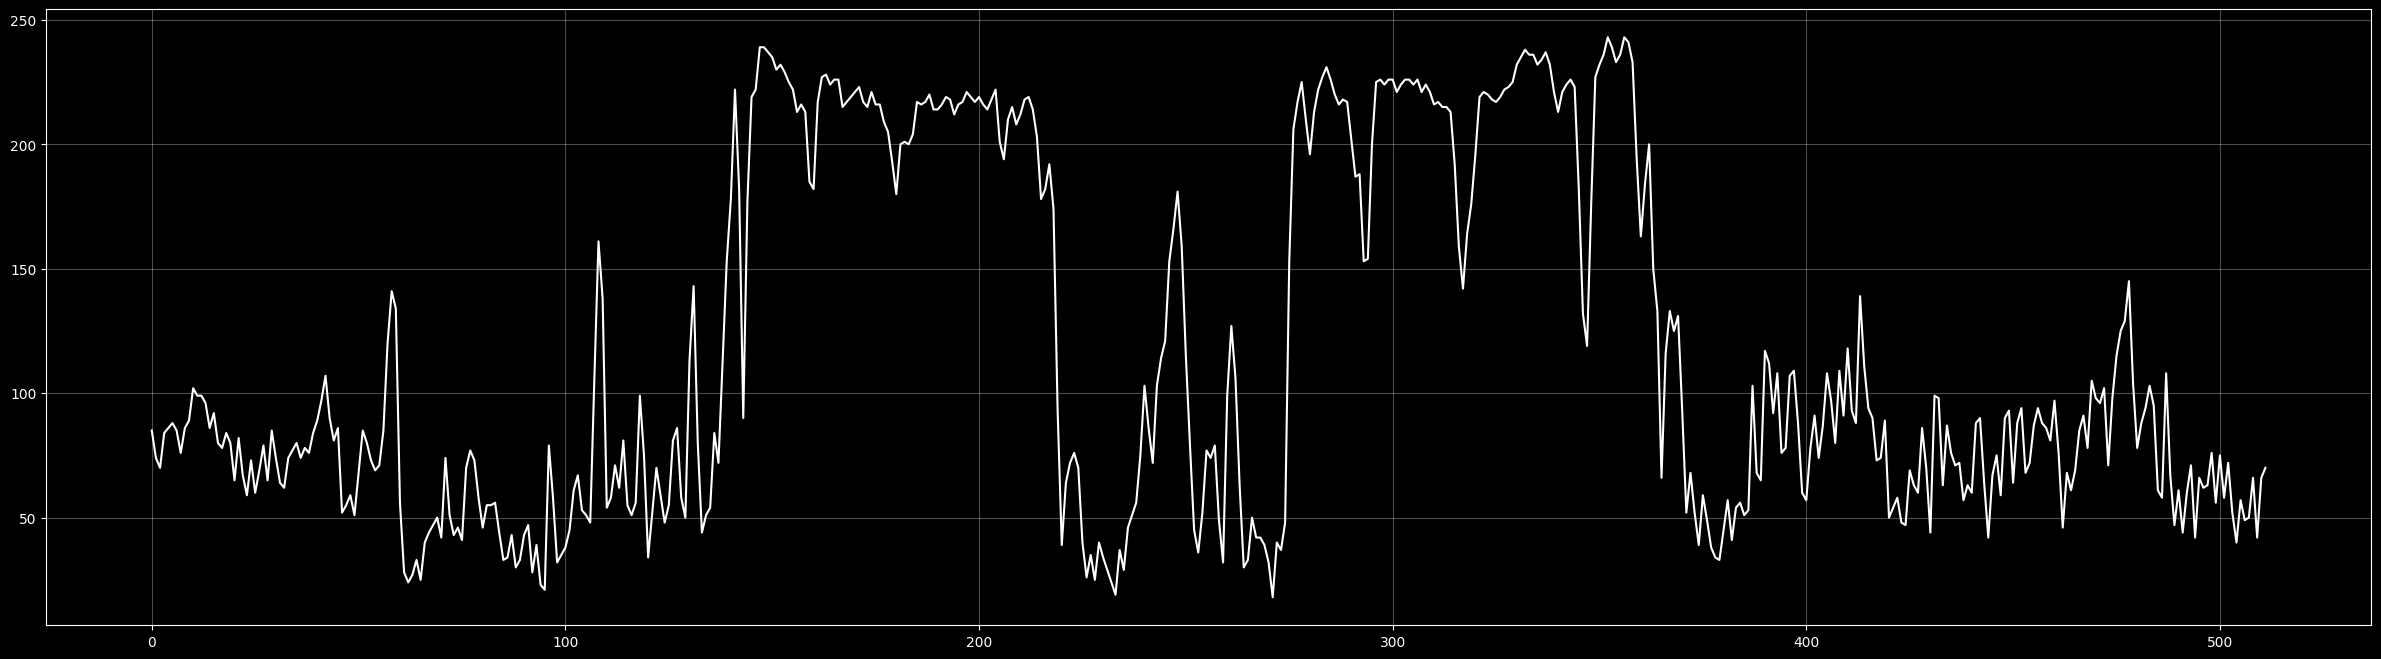

In [40]:
fig, ax = plt.subplots(figsize=(30,8))
ax.plot(img[300,:,2], c='w')
ax.set_facecolor('k')
ax.grid(alpha=0.3)
plt.show()

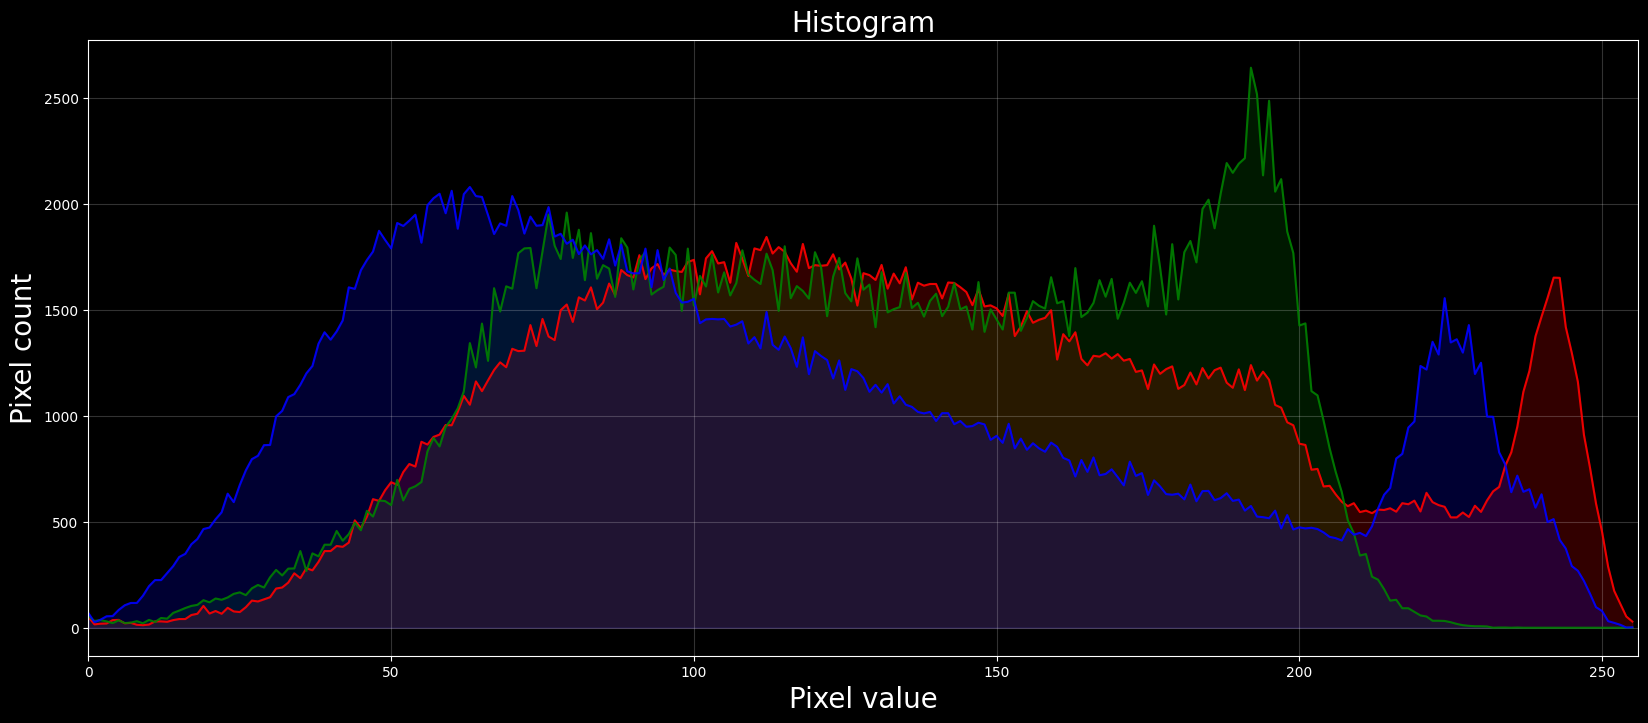

In [42]:
def hist(img,fill=False,filename=None):
    fig, ax = plt.subplots(figsize=(20,8))
    colors = ['r','g','b']
    for i, color in enumerate(colors):
        histr = cv.calcHist([img],[i],None,[256],[0,256])
        ax.plot(histr, c=color, alpha=0.9)
        x = np.arange(0.0, 256, 1)
        if fill:
            ax.fill_between(x, 0, histr.ravel(), alpha=0.2, color=color)
    ax.set_xlim([0,256])
    ax.grid(alpha=0.2)
    ax.set_facecolor('k')
    ax.set_title('Histogram', fontsize=20)
    ax.set_xlabel('Pixel value', fontsize=20)
    ax.set_ylabel('Pixel count', fontsize=20)

    if filename != None:
        plt.savefig(filename)
    plt.show()

hist(img,True)

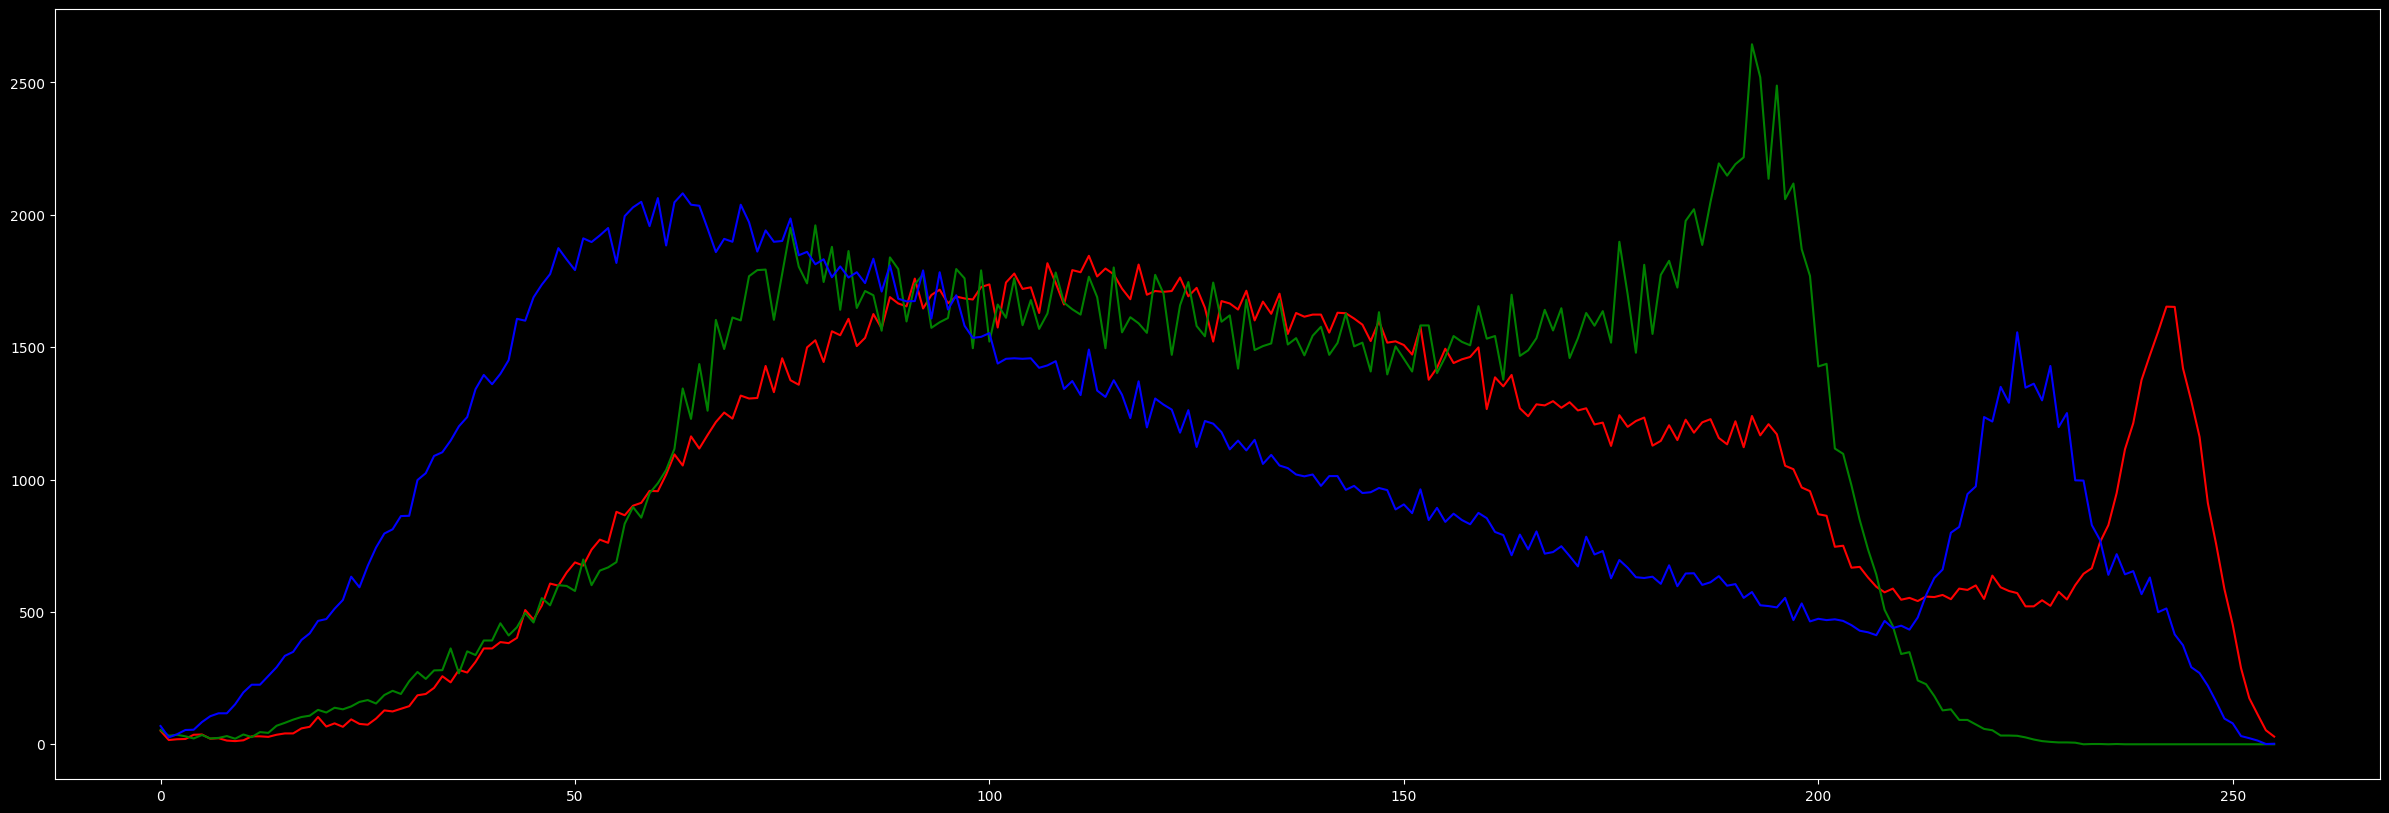

In [43]:
def hist(img,filename=None):
    
    fig = plt.figure(figsize=(30,10))
    ax1 = fig.add_subplot(111)
    colors = ['r','g','b']
    for i,color in enumerate(colors):
        histr = cv.calcHist([img],[i],None,[256],[0,256])
        ax1.plot(histr,c=color)
    plt.show()
hist(img)